In [44]:
from dotenv import load_dotenv
# Load environment variables from .env file
load_dotenv()

True

In [45]:
import os
openai_key = os.getenv("OPENAI_API_KEY")
openai_api_base = os.getenv("OPENAI_API_BASE")
openai_api_version = "2025-01-01-preview"
model = "gpt-4.1"

In [46]:
from langchain.chat_models import AzureChatOpenAI

llm = AzureChatOpenAI(
    openai_api_key=openai_key,
    openai_api_base=openai_api_base,
    deployment_name=model,
    openai_api_version=openai_api_version,  # Or your specific version
    temperature=0.0,
    max_tokens=1000,
    max_retries=3
)

/home/skundu/Documents/MY_PROJECT/ai/venv/lib/python3.12/site-packages/langchain_community/chat_models/azure_openai.py:174: UserWarning: As of openai>=1.0.0, Azure endpoints should be specified via the `azure_endpoint` param not `openai_api_base` (or alias `base_url`). Updating `openai_api_base` from https://optra-kolkata-openai.openai.azure.com/ to https://optra-kolkata-openai.openai.azure.com/openai.
  warnings.warn(
/home/skundu/Documents/MY_PROJECT/ai/venv/lib/python3.12/site-packages/langchain_community/chat_models/azure_openai.py:181: UserWarning: As of openai>=1.0.0, if `deployment_name` (or alias `azure_deployment`) is specified then `openai_api_base` (or alias `base_url`) should not be. Instead use `deployment_name` (or alias `azure_deployment`) and `azure_endpoint`.
  warnings.warn(
/home/skundu/Documents/MY_PROJECT/ai/venv/lib/python3.12/site-packages/langchain_community/chat_models/azure_openai.py:189: UserWarning: As of openai>=1.0.0, if `openai_api_base` (or alias `base_u

In [47]:
# Example usage of the llm
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b663f05c2c', 'finish_reason': 'stop', 'logprobs': None}, id='run--c499941c-ff43-46db-83e4-bdc6b198767e-0')

In [48]:
from typing import TypedDict, Annotated
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State) -> State:
    """
    A simple chatbot function that invokes the LLM with the current state messages.
    """
    return {"messages": [llm.invoke(state["messages"])]}  # Assuming state["messages"] is a list of messages

In [49]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(State)
builder.add_node("chatbot_node", chatbot)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()

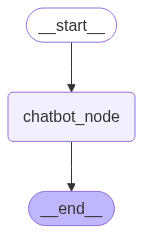

In [50]:
# pip install graphviz
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
messages = {
            "role": "user",
            "content": "Hi, how are you?",
            }
response = graph.invoke({"messages": [messages]}) 
response['messages']

[HumanMessage(content='Hi, how are you?', additional_kwargs={}, response_metadata={}, id='90254d5d-3140-459f-bda8-16dfc06e365c'),
 AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 30, 'prompt_tokens': 13, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_b663f05c2c', 'finish_reason': 'stop', 'logprobs': None}, id='run--6c861557-e44d-42a3-9c7e-6b15a2cb1f4e-0')]

In [52]:
state = None
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit", "stop", "x", "q"]:
        print("Goodbye!")
        break
    messages = {
        "role": "user",
        "content": user_input,
    } 
    
    if state is None:
        state : State = {
            "messages": [messages]
        }
    else:
        state["messages"].append(messages)
    
    state = graph.invoke(state)
    bot_response = state['messages'][-1].content
    print("state: ",state['messages'])
    print(f"YOU: {user_input}")
    print(f"BOT: {bot_response}")

state:  [HumanMessage(content='Last footbal wc?', additional_kwargs={}, response_metadata={}, id='e65c4e4e-21a3-41e7-8de2-bcdd5b5ebb7d'), AIMessage(content="The most recent FIFA World Cup was held in **Qatar in 2022**. The tournament took place from **November 20 to December 18, 2022**. **Argentina** won the World Cup, defeating **France** in the final after a dramatic 3-3 draw, with Argentina winning **4-2 on penalties**. Lionel Messi was a standout player and was awarded the Golden Ball as the tournament's best player.\n\nThe next FIFA World Cup will be held in **2026** in the United States, Canada, and Mexico.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 115, 'prompt_tokens': 12, 'total_tokens': 127, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fi